In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

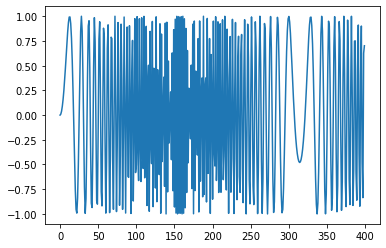

In [2]:
# make the data
series = np.sin((0.1 * np.arange(400))**2)
# This setup performs good without the noise but fails with noise
#plot
plt.plot(series)
plt.show()

In [3]:
# build the data set
T = 10
X = []
Y = []
D = 1
for t in range(len(series) - T):
    x = series[t:t+T]
    y = series[t+T]
    X.append(x)
    Y.append(y)
    
X = np.array(X).reshape(-1, T)
Y = np.array(Y)

N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10) Y.shape (390,)


### Autoregressive linear model

In [4]:
# try autoregressive model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.1))
r = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs=80)

Epoch 1/80
7/7 [==============================] - 0s 45ms/step - loss: 0.9760 - val_loss: 0.5103
Epoch 2/80
7/7 [==============================] - 0s 11ms/step - loss: 0.5982 - val_loss: 0.7286
Epoch 3/80
7/7 [==============================] - 0s 14ms/step - loss: 0.6067 - val_loss: 0.7905
Epoch 4/80
7/7 [==============================] - 0s 14ms/step - loss: 0.5733 - val_loss: 0.6766
Epoch 5/80
7/7 [==============================] - 0s 14ms/step - loss: 0.5398 - val_loss: 0.6499
Epoch 6/80
7/7 [==============================] - 0s 14ms/step - loss: 0.5305 - val_loss: 0.6550
Epoch 7/80
7/7 [==============================] - 0s 14ms/step - loss: 0.5046 - val_loss: 0.6095
Epoch 8/80
7/7 [==============================] - 0s 14ms/step - loss: 0.5155 - val_loss: 0.6271
Epoch 9/80
7/7 [==============================] - 0s 14ms/step - loss: 0.5444 - val_loss: 0.7110
Epoch 10/80
7/7 [==============================] - 0s 14ms/step - loss: 0.5435 - val_loss: 0.7140
Epoch 11/80
7/7 [============

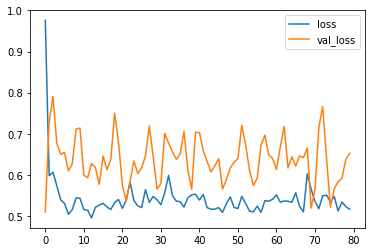

In [5]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

(390, 1)


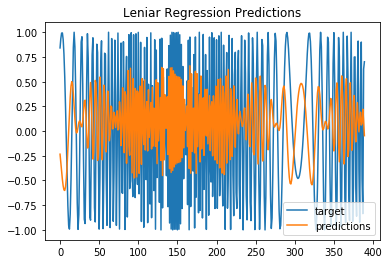

In [8]:
# One step forecast
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label="target")
plt.plot(predictions, label="predictions")
plt.title("Leniar Regression Predictions")
plt.legend()
plt.show()

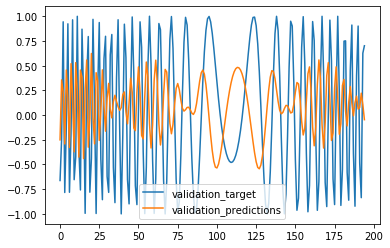

In [9]:
# "wrong" forecast using true targets
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation
i = -N//2

while(len(validation_predictions) < len(validation_target)):
    P = model.predict(X[i].reshape(1,-1))[0,0]
    i = i+1
    validation_predictions.append(P)
    
# Plot the predictions
plt.plot(validation_target, label='validation_target')
plt.plot(validation_predictions, label='validation_predictions')
plt.legend()
plt.show()

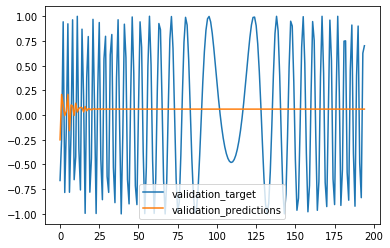

In [10]:
# "Correct" forecast using self predicted
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation
last_x = X[-N//2]

while(len(validation_predictions) < len(validation_target)):
    P = model.predict(last_x.reshape(1,-1))[0,0]
    validation_predictions.append(P)
    last_x = np.roll(last_x, -1)
    last_x[-1] = P
    
# Plot the predictions
plt.plot(validation_target, label='validation_target')
plt.plot(validation_predictions, label='validation_predictions')
plt.legend()
plt.show()

### Simple RNN Model

In [23]:
# Reshape Input
X = X.reshape(-1, T, 1)

# build RNN model
i = Input(shape=(T,D))
x = GRU(10)(i)                                 # try SimpleRNN, LSTM, GRUs
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.05))

r = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs=200)

Epoch 1/200
7/7 [==============================] - 0s 38ms/step - loss: 0.5251 - val_loss: 0.6919
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 0.5270 - val_loss: 0.5856
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 0.5329 - val_loss: 0.5186
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 0.5090 - val_loss: 0.5657
Epoch 5/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4994 - val_loss: 0.5568
Epoch 6/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4604 - val_loss: 0.5763
Epoch 7/200
7/7 [==============================] - 0s 10ms/step - loss: 0.3997 - val_loss: 0.4428
Epoch 8/200
7/7 [==============================] - 0s 9ms/step - loss: 0.3353 - val_loss: 0.4248
Epoch 9/200
7/7 [==============================] - 0s 9ms/step - loss: 0.2545 - val_loss: 0.2071
Epoch 10/200
7/7 [==============================] - 0s 9ms/step - loss: 0.1486 - val_loss: 0.1475
Epoch 11/200
7/7 [======

Epoch 84/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0233 - val_loss: 0.0236
Epoch 85/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0124 - val_loss: 0.0274
Epoch 86/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0071 - val_loss: 0.0240
Epoch 87/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0102 - val_loss: 0.0190
Epoch 88/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0074 - val_loss: 0.0214
Epoch 89/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0092 - val_loss: 0.0340
Epoch 90/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0083 - val_loss: 0.0218
Epoch 91/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0057 - val_loss: 0.0195
Epoch 92/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0033 - val_loss: 0.0208
Epoch 93/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0051 - val_loss: 0.0289
Epoch 94/2

7/7 [==============================] - 0s 10ms/step - loss: 0.0038 - val_loss: 0.0203
Epoch 167/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0045 - val_loss: 0.0104
Epoch 168/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0033 - val_loss: 0.0230
Epoch 169/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0041 - val_loss: 0.0115
Epoch 170/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0034 - val_loss: 0.0156
Epoch 171/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0028 - val_loss: 0.0146
Epoch 172/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0027 - val_loss: 0.0135
Epoch 173/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0026 - val_loss: 0.0115
Epoch 174/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0024 - val_loss: 0.0122
Epoch 175/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0018 - val_loss: 0.0143
Epoch 176/200
7/7 [

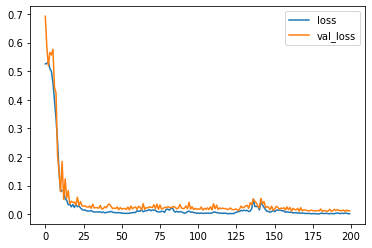

In [24]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

(390, 1)


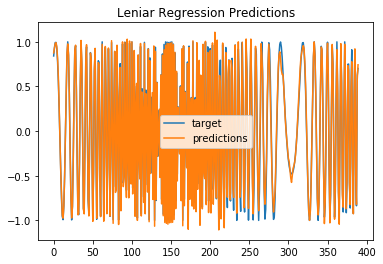

In [25]:
# One step forecast
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label="target")
plt.plot(predictions, label="predictions")
plt.title("Leniar Regression Predictions")
plt.legend()
plt.show()

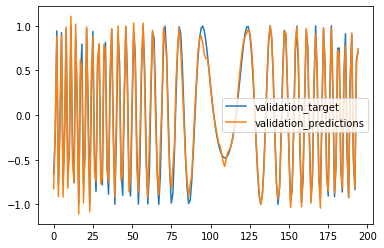

In [26]:
# "wrong" forecast using true targets
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation
i = -N//2

while(len(validation_predictions) < len(validation_target)):
    P = model.predict(X[i].reshape(1,-1,1))[0,0]
    i = i+1
    validation_predictions.append(P)
    
# Plot the predictions
plt.plot(validation_target, label='validation_target')
plt.plot(validation_predictions, label='validation_predictions')
plt.legend()
plt.show()

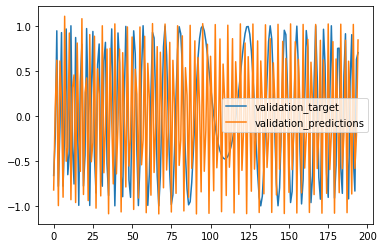

In [27]:
# "Correct" forecast using self predicted
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation
last_x = X[-N//2]

while(len(validation_predictions) < len(validation_target)):
    P = model.predict(last_x.reshape(1,-1,1))[0,0]
    validation_predictions.append(P)
    last_x = np.roll(last_x, -1)
    last_x[-1] = P
    
# Plot the predictions
plt.plot(validation_target, label='validation_target')
plt.plot(validation_predictions, label='validation_predictions')
plt.legend()
plt.show()